<a href="https://colab.research.google.com/github/thisisreallife/Medium/blob/master/Jeffery's_Tramcar_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[5.3 The Tramcar Problem](https://arxiv.org/pdf/0804.3173.pdf)

In [55]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [52]:
# simulation
n_list = [1,2,3,4,5,10,15,20,30,50,100] # total number of the tramcars
mle_mse , mle_bias , mle_var , bayes_mse , bayes_bias , bayes_var = ([] for i in range(6))

for population_size in tqdm(n_list):
    mle_est = []
    bayes_est = []
    for i in tqdm(range(1000)):
        sample = np.random.randint(1,population_size+1,1)[0] # the single observation
        mle_est.append(sample) # mle := sample
        bayes_est.append(sample*2) # bayesian posterior median estimatro := 2*sample

    mle_mse.append(np.mean((np.array(mle_est) - population_size)**2))
    mle_bias.append(np.mean((population_size - np.mean(mle_est))**2))
    mle_var.append(np.var(mle_est))
    bayes_mse.append(np.mean((np.array(bayes_est) - population_size)**2))
    bayes_bias.append(np.mean((population_size - np.mean(bayes_est))**2))
    bayes_var.append(np.var(bayes_est))

data = pd.DataFrame([n_list, mle_mse , mle_bias , mle_var , bayes_mse , bayes_bias , bayes_var]).T
data.columns = ['n', 'mle_mse' , 'mle_bias' , 'mle_var' , 'bayes_mse' , 'bayes_bias' , 'bayes_var']

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [74]:
data

,n,mle_mse,mle_bias,mle_var,bayes_mse,bayes_bias,bayes_var
0,1.0,0.000,0.000000,0.000000,1.000,1.000000,0.000000
1,2.0,0.473,0.223729,0.249271,2.108,1.110916,0.997084
2,3.0,1.655,1.014049,0.640951,3.536,0.972196,2.563804
3,4.0,3.661,2.325625,1.335375,6.244,0.902500,5.341500
4,5.0,5.917,3.948169,1.968831,8.928,1.052676,7.875324
5,10.0,28.519,20.169081,8.349919,34.436,1.036324,33.399676
6,15.0,66.014,47.720464,18.293536,74.576,1.401856,73.174144
7,20.0,126.478,93.276964,33.201036,133.272,0.467856,132.804144
8,30.0,299.653,223.353025,76.299975,305.212,0.012100,305.199900
9,50.0,827.908,621.804096,206.103904,824.432,0.016384,824.415616


As we can see below, for 1 sample scenario, MLE and Bayes estimator share the similar MSE performance. With increasing of number of tramcars, Bayes estimator 
tends to have low Bias and large Variance. MLE shows opposite performance.

Text(0.5, 1.0, 'Variance')

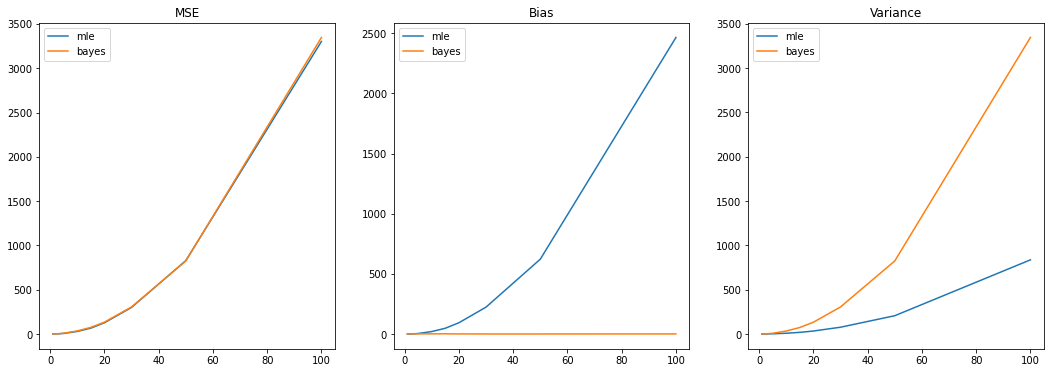

In [89]:
plt.figure(figsize = (18,6))

plt.subplot(131)
plt.plot(data.n, data.mle_mse)
plt.plot(data.n, data.bayes_mse)
plt.legend(['mle', 'bayes'])
plt.title('MSE')

plt.subplot(132)
plt.plot(data.n, data.mle_bias)
plt.plot(data.n, data.bayes_bias)
plt.legend(['mle', 'bayes'])
plt.title('Bias')

plt.subplot(133)
plt.plot(data.n, data.mle_var)
plt.plot(data.n, data.bayes_var)
plt.legend(['mle', 'bayes'])
plt.title('Variance')

One more question, what would happen if we have multiple samples? i.e one persion observe multiple times or multiple individuals have their own observations?